# Bitbrains Dataset Exploration

In [1]:
import matplotlib. pyplot as plt
import os
import numpy as np
import pandas as pd

## Generate a Figure per VM

## CPU Utilization

In [31]:
# CPU utilization
# New figure each VMs
# Get all the series
dataset_path = r'../Datasets/fastStorage/2013-8'
figures_path = '../Figures/DataExploration/CPU_utilization'
files = os.listdir(dataset_path)  # Get all the files in that directory

for idx,serie in enumerate(files):
    VM_path = os.path.join(dataset_path, serie)
    # Read time series of each Virtual Machine (VM)
    VM = pd.read_csv(VM_path,sep=';\t', index_col=0, parse_dates=True, squeeze=True, engine='python')
    fig = plt.figure(figsize=(10, 5), dpi=150)
    #plt.ion()
    VM['CPU usage [%]'].plot(label='Raw data')
    VM['CPU usage [%]'].rolling(window = 10).mean().plot(label='MA(10) filter')
    plt.legend()
    plt.title('CPU usage')
    plt.ylabel("CPU usage [%]")
    plt.title('CPU usage %s' %str(idx))
    save_path = os.path.join(figures_path,"VM%s"%str(idx))
    plt.savefig(save_path, bbox_inches='tight')
    plt.close(fig)

### Memory utilization

In [32]:
# Memory utilization
# New figure each VM
# Get all the series
dataset_path = r'../Datasets/fastStorage/2013-8'
figures_path = '../Figures/DataExploration/memory_utilization'
files = os.listdir(dataset_path)  # Get all the files in that directory
for idx,serie in enumerate(files):
    VM_path = os.path.join(dataset_path, serie)
    # Read time series of each Virtual Machine (VM)
    VM = pd.read_csv(VM_path,sep=';\t', index_col=0, parse_dates=True, squeeze=True, engine='python')
    # Create new variable memory usage in %
    VM['Memory usage [%]'] = VM['Memory usage [KB]'] * 100 / VM['Memory capacity provisioned [KB]']
    # Avoid division by 0
    VM['Memory usage [%]'] = VM['Memory usage [%]'].fillna(0)
    fig = plt.figure(figsize=(10, 5), dpi=150)
    VM['Memory usage [%]'].plot(label='Raw data')
    VM['Memory usage [%]'].rolling(window = 10).mean().plot(label='MA(10) filter')
    plt.legend()
    plt.ylabel('Memory usage [%]')
    plt.ylim((0,125))
    plt.title('Memory usage %s' %str(idx))
    save_path = os.path.join(figures_path,"VM%s"%str(idx))
    plt.savefig(save_path, bbox_inches='tight')
    plt.close(fig)

## Duration of jobs

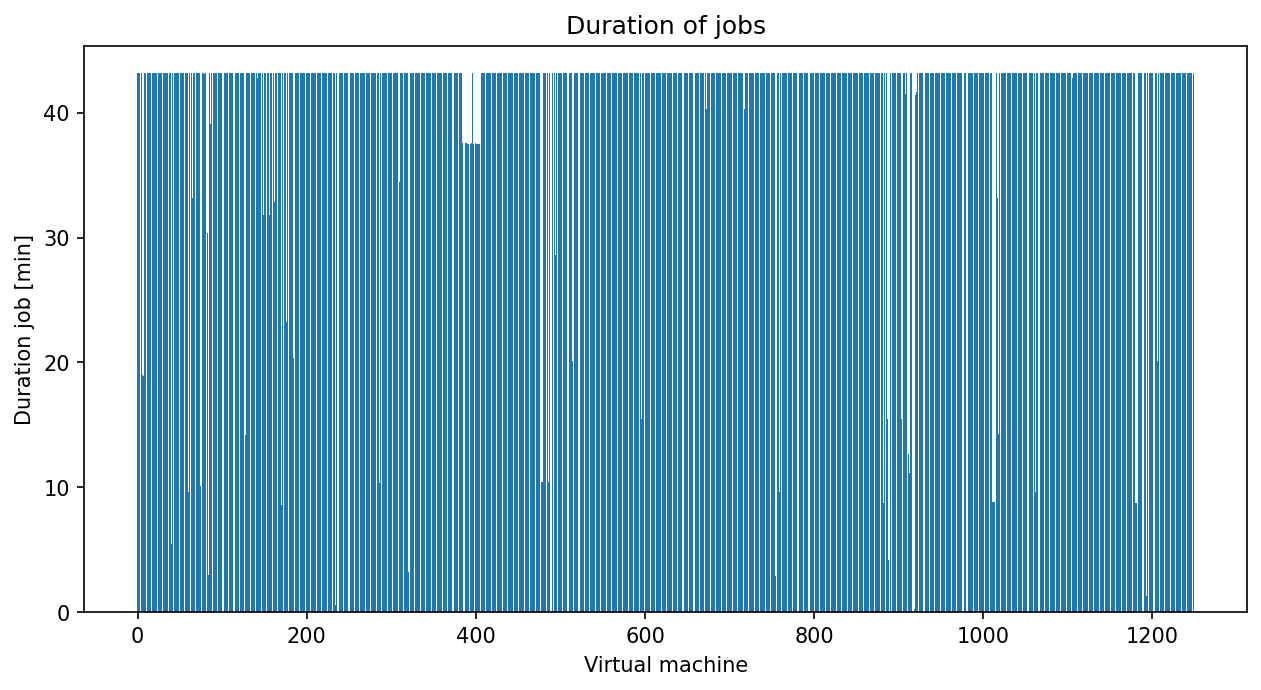

In [2]:
# Get all the series
dataset_path = r'../Datasets/fastStorage/2013-8'
files = os.listdir(dataset_path)  # Get all the files in that directory
duration_jobs = np.zeros(len(files))
for idx,serie in enumerate(files):
    VM_path = os.path.join(dataset_path, serie)
    # Read time series of each Virtual Machine (VM)
    VM = pd.read_csv(VM_path,sep=';\t', index_col=0, parse_dates=True, squeeze=True, engine='python')
    # Parse time
    time = (VM.index[len(VM)-1] - VM.index[0]) / (1000*60)
    duration_jobs[idx] = time

# Generate plot
fig = plt.figure(figsize=(10, 5), dpi=150)
plt.bar(np.arange(1250),duration_jobs)
plt.title("Duration of jobs")
plt.xlabel('Virtual machine')
plt.ylabel('Duration job [min]')
plt.show()

## Check for duplicates

In [5]:
VM_path = '../Datasets/fastStorage/2013-8/10.csv'
VM = pd.read_csv(VM_path,sep=';\t', index_col=0, parse_dates=True, squeeze=True, engine='python')
print(VM.shape)
print(len(VM.index.unique()))

(16140, 10)
12340


In [6]:
# Group by index and average
VM = VM.groupby(VM.index).mean()
VM.index.has_duplicates

False

## Data center dataframe

In [7]:
# New dataframe
Datacenter = pd.DataFrame()
# Get all the series
dataset_path = r'../Datasets/fastStorage/2013-8'
files = os.listdir(dataset_path)  # Get all the files in that directory
for serie in files:
    VM_path = os.path.join(dataset_path, serie)
    # Read time series of each Virtual Machine (VM)
    VM = pd.read_csv(VM_path,sep=';\t', index_col=0, parse_dates=True, squeeze=True, engine='python')
    # Create new variable memory usage in %
    VM['Memory usage [%]'] = VM['Memory usage [KB]'] * 100 / VM['Memory capacity provisioned [KB]']
    # Avoid division by 0
    VM['Memory usage [%]'] = VM['Memory usage [%]'].fillna(0)
    # Average duplicates
    # Group by index and average
    VM = VM.groupby(VM.index).mean()
    Datacenter = pd.concat([Datacenter, VM]).groupby('Timestamp [ms]').sum()

In [8]:
# Fix percentages
Datacenter['CPU usage [%]'] = Datacenter['CPU usage [%]']  / 1250
Datacenter['Memory usage [%]'] = Datacenter['Memory usage [%]']  / 1250

In [24]:
# Generate figures
figures_path = '../Figures/DataExploration/CPU_utilization'
fig = plt.figure(figsize=(8, 6), dpi=120)
Datacenter['CPU usage [%]'].plot(label='Raw data')
Datacenter['CPU usage [%]'].rolling(window = 10).mean().plot(label='MA(10) filter')
plt.legend()
plt.ylabel('CPU usage [%]')
plt.title('CPU usage Datacenter')
save_path = os.path.join(figures_path,"Datacenter")
plt.savefig(save_path, bbox_inches='tight')
plt.close(fig)
figures_path = '../Figures/DataExploration/memory_utilization'
fig = plt.figure(figsize=(8, 6), dpi=120)
Datacenter['Memory usage [%]'].plot(label='Raw data')
Datacenter['Memory usage [%]'].rolling(window = 10).mean().plot(label='MA(10) filter')
plt.legend()
plt.ylabel('Memory usage [%]')
plt.title('Memory usage Datacenter')
save_path = os.path.join(figures_path,"Datacenter")
plt.savefig(save_path, bbox_inches='tight')
plt.close(fig)

## One dataframe each 100 VMs

In [16]:
# New dataframe
Datacenters = {}
# Get all the series
dataset_path = r'../Datasets/fastStorage/2013-8'
files = os.listdir(dataset_path)  # Get all the files in that directory
idx = 0
center = 0
Datacenter = pd.DataFrame()
for serie in files:
    if idx == 100:
        # Fix percentage
        Datacenter['CPU usage [%]'] = Datacenter['CPU usage [%]']  / 100
        Datacenter['Memory usage [%]'] = Datacenter['Memory usage [%]']  / 100
        Datacenters[center] = Datacenter
        Datacenter = pd.DataFrame()
        center += 1
        idx = 0
    VM_path = os.path.join(dataset_path, serie)
    # Read time series of each Virtual Machine (VM)
    VM = pd.read_csv(VM_path, sep=';\t', index_col=0, parse_dates=True, squeeze=True, engine='python')
    # Create new variable memory usage in %
    VM['Memory usage [%]'] = VM['Memory usage [KB]'] * 100 / VM['Memory capacity provisioned [KB]']
    # Avoid divion by 0
    VM['Memory usage [%]'] = VM['Memory usage [%]'].fillna(0)
    # Average duplicates
    # Group by index and average
    VM = VM.groupby(VM.index).mean()
    Datacenter = pd.concat([Datacenter, VM]).groupby('Timestamp [ms]').sum()
    idx += 1

In [25]:
# Generate plots and save images
#CPU utilization
figures_path = '../Figures/DataExploration/CPU_utilization'
for key, datacenter in Datacenters.items():
    # the image has the default dimensions and resolution given by matplotlib
    # default figsize is (8,6)
    fig = plt.figure(figsize=(8, 6), dpi=120)
    datacenter['CPU usage [%]'].plot(label='Raw data')
    datacenter['CPU usage [%]'].rolling(window = 10).mean().plot(label='MA(10) filter')
    plt.legend()
    plt.ylabel('CPU usage [%]')
    plt.title('CPU usage DC%s' %str(key))
    save_path = os.path.join(figures_path,"DC%s"%str(key))
    plt.savefig(save_path, bbox_inches='tight')
    plt.close(fig)

In [27]:
#Memory utilization
figures_path = '../Figures/DataExploration/memory_utilization'
for key, datacenter in Datacenters.items():
    # the image has the default dimensions and resolution given by matplotlib
    # default figsize is (8,6)
    fig = plt.figure(figsize=(8, 6), dpi=120)
    datacenter['Memory usage [%]'].plot(label='Raw data')
    datacenter['Memory usage [%]'].rolling(window = 10).mean().plot(label='MA(10) filter')
    plt.legend()
    plt.ylim((0,125))
    plt.ylabel('Memory usage [%]')
    plt.title('Memory usage DC%s' %str(key))
    save_path = os.path.join(figures_path,"DC%s"%str(key))
    plt.savefig(save_path, bbox_inches='tight')
    plt.close(fig)

In [29]:
%matplotlib inline